In [82]:
from torch.utils.data import Dataset, DataLoader
import scipy.io
import os
import torch
from skimage import io
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 

In [28]:
train_dir="./Train"
x=[i[:-4] for i in os.listdir(train_dir+"/Labels/")]
x.sort()
print(x)

['train_1', 'train_10', 'train_11', 'train_12', 'train_13', 'train_14', 'train_15', 'train_16', 'train_17', 'train_18', 'train_19', 'train_2', 'train_20', 'train_21', 'train_22', 'train_23', 'train_24', 'train_25', 'train_26', 'train_27', 'train_3', 'train_4', 'train_5', 'train_6', 'train_7', 'train_8', 'train_9']


In [29]:
label_path=os.path.join("./Train","Labels",'train_1')+".mat"
print(label_path)

./Train/Labels/train_1.mat


In [137]:
x=np.asarray([5])
x=np.expand_dims(x, axis=0)
print(x.shape)

(1, 1)


In [148]:
class CellDataset(Dataset):
    """Cell Counting dataset."""

    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with the Images and Labels folders.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.fileNames = self.matsToFileNames(root_dir) #list of instance file names
        self.root_dir = root_dir
#         self.transform = transform

    def matsToFileNames(self,root_dir):
        x=[i[:-4] for i in os.listdir(root_dir+"/Labels/")]
        x.sort()
        return x

    def __len__(self):
        return len(self.fileNames)

    def __getitem__(self, idx):
        """
        Returns a dictionary with the following keys:
            image: nparray of shape 1000,1000,3 of the png image
            inst_map: nparray of shape 1000,1000 
                -- containing a unique integer for each individual nucleus. i.e the map ranges from 0 to N, where 0 is the background and N is the number of nuclei.
            X inst_centroid: a list with one item, the nparray of shape N,2 where N is the total number of nuclei in the image 
                -- giving the x and y coordinates of the centroids of each instance (in order of inst map ID).
            count: a list with a int , where it is the total number of nuclei in the image
        """
        if torch.is_tensor(idx):
            idx = idx.tolist() #?

        img_name = os.path.join(self.root_dir,"Images",self.fileNames[idx])+".png"
        image = io.imread(img_name)
        if image.shape[2]!=3:
            image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
        label_path=os.path.join(self.root_dir,"Labels",self.fileNames[idx])+".mat"
        dictmat = scipy.io.loadmat(label_path)
#         inst_centroid=dictmat["inst_centroid"]
#         inst_centroid=np.expand_dims(inst_centroid, axis=0)
#         sample = {'image': image, 'inst_map': dictmat["inst_map"], "inst_centroid":inst_centroid, 'count':np.asarray([(len(dictmat["inst_centroid"]))])}
        sample = {'image': image, 'inst_map': dictmat["inst_map"], 'count':np.expand_dims(len(dictmat["inst_centroid"]), axis=0)}

#         if self.transform:
#             sample = self.transform(sample)

        return sample

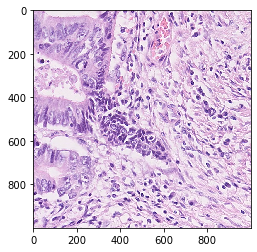

0 (1000, 1000, 3) (1000, 1000) [850]


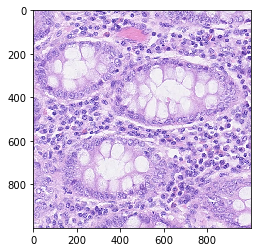

1 (1000, 1000, 3) (1000, 1000) [997]


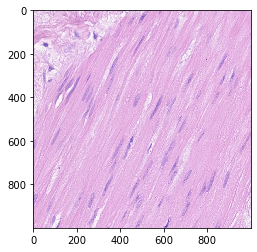

2 (1000, 1000, 3) (1000, 1000) [100]


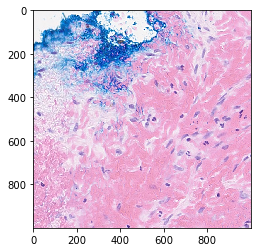

3 (1000, 1000, 3) (1000, 1000) [135]


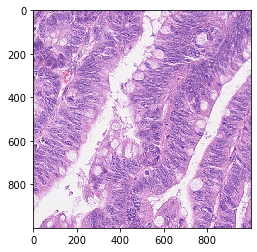

4 (1000, 1000, 3) (1000, 1000) [749]


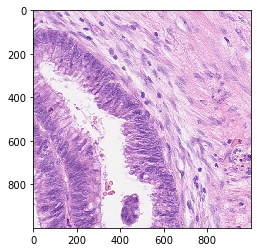

5 (1000, 1000, 3) (1000, 1000) [502]


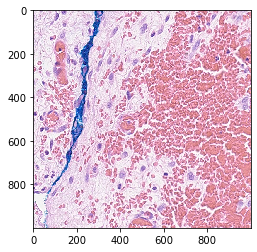

6 (1000, 1000, 3) (1000, 1000) [161]


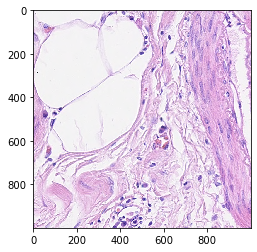

7 (1000, 1000, 3) (1000, 1000) [262]


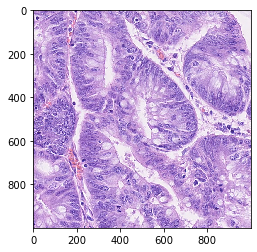

8 (1000, 1000, 3) (1000, 1000) [805]


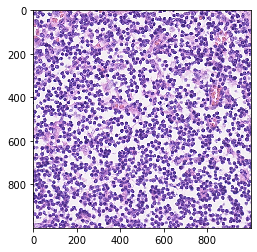

9 (1000, 1000, 3) (1000, 1000) [2283]


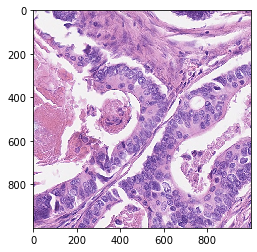

10 (1000, 1000, 3) (1000, 1000) [839]


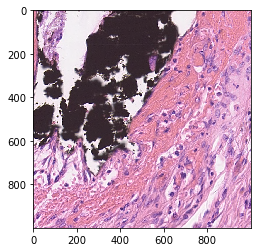

11 (1000, 1000, 3) (1000, 1000) [293]


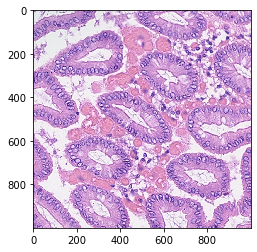

12 (1000, 1000, 3) (1000, 1000) [539]


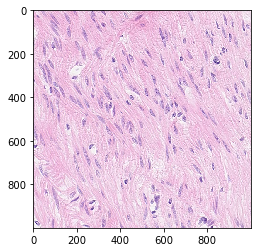

13 (1000, 1000, 3) (1000, 1000) [261]


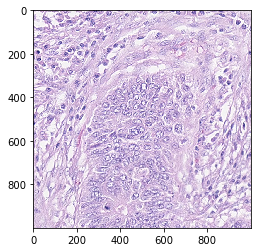

14 (1000, 1000, 3) (1000, 1000) [741]


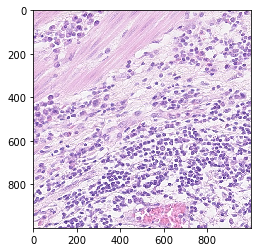

15 (1000, 1000, 3) (1000, 1000) [1242]


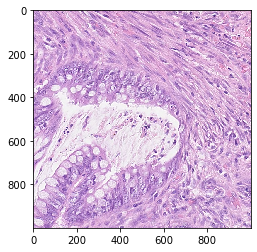

16 (1000, 1000, 3) (1000, 1000) [767]


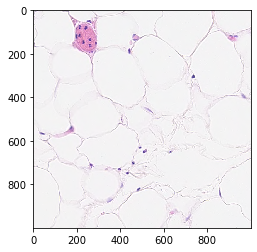

17 (1000, 1000, 3) (1000, 1000) [40]


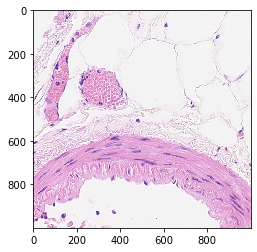

18 (1000, 1000, 3) (1000, 1000) [145]


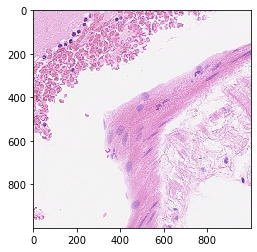

19 (1000, 1000, 3) (1000, 1000) [63]


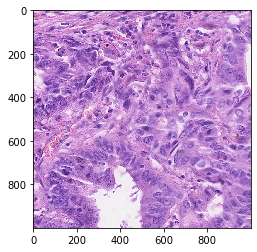

20 (1000, 1000, 3) (1000, 1000) [677]


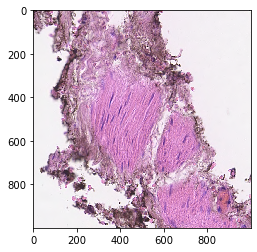

21 (1000, 1000, 3) (1000, 1000) [80]


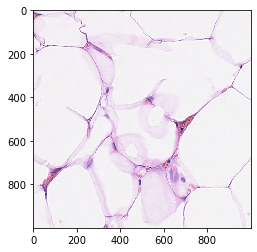

22 (1000, 1000, 3) (1000, 1000) [20]


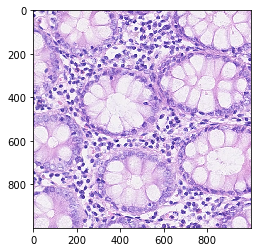

23 (1000, 1000, 3) (1000, 1000) [767]


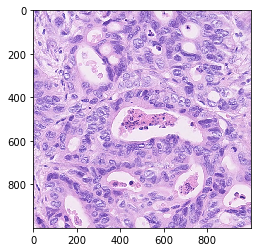

24 (1000, 1000, 3) (1000, 1000) [699]


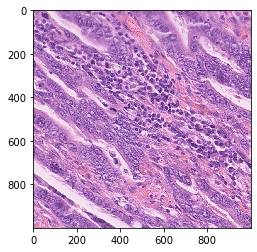

25 (1000, 1000, 3) (1000, 1000) [891]


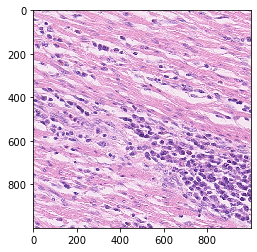

26 (1000, 1000, 3) (1000, 1000) [647]


In [149]:
train_ds = CellDataset(root_dir="./Train")

for i in range(len(train_ds)):
    sample = train_ds[i]
    plt.imshow(sample['image'], interpolation='nearest')
    plt.show()
#     print(i, sample['image'].shape, sample['inst_map'].shape,sample['inst_centroid'].shape,sample['count'])
    print(i, sample['image'].shape, sample['inst_map'].shape,sample['count'])

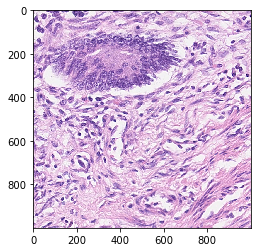

0 (1000, 1000, 3) (1000, 1000) [865]


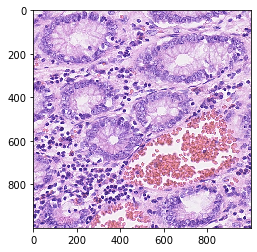

1 (1000, 1000, 3) (1000, 1000) [845]


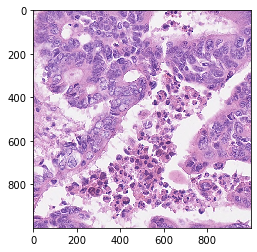

2 (1000, 1000, 3) (1000, 1000) [1077]


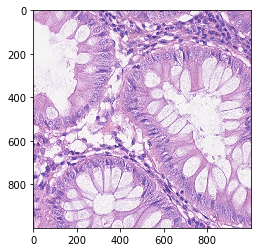

3 (1000, 1000, 3) (1000, 1000) [428]


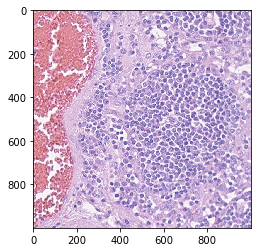

4 (1000, 1000, 3) (1000, 1000) [1359]


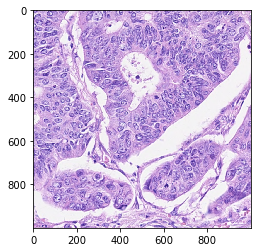

5 (1000, 1000, 3) (1000, 1000) [556]


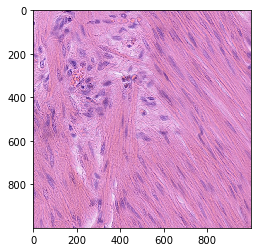

6 (1000, 1000, 3) (1000, 1000) [245]


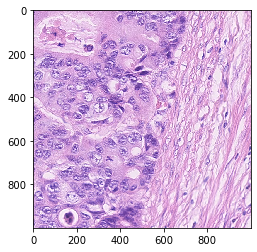

7 (1000, 1000, 3) (1000, 1000) [394]


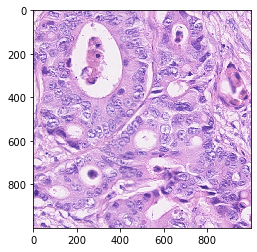

8 (1000, 1000, 3) (1000, 1000) [418]


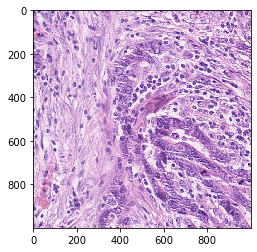

9 (1000, 1000, 3) (1000, 1000) [910]


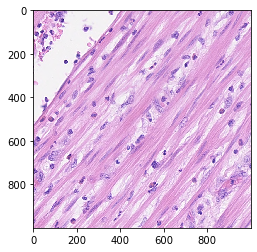

10 (1000, 1000, 3) (1000, 1000) [300]


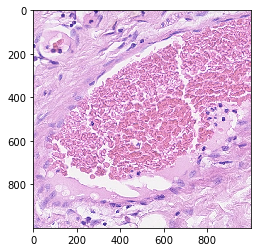

11 (1000, 1000, 3) (1000, 1000) [241]


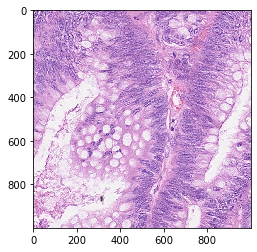

12 (1000, 1000, 3) (1000, 1000) [626]


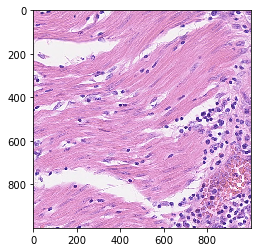

13 (1000, 1000, 3) (1000, 1000) [513]


In [151]:
test_ds = CellDataset(root_dir="./Test")

for i in range(len(test_ds)):
    sample = test_ds[i]
    plt.imshow(sample['image'], interpolation='nearest')
    plt.show()
#     print(i, sample['image'].shape, sample['inst_map'].shape,sample['inst_centroid'].shape,sample['count'])
    print(i, sample['image'].shape, sample['inst_map'].shape,sample['count'])

In [150]:
# DataLoader
train_dataloader = DataLoader(train_ds, batch_size=4, shuffle=False)

for i_batch, sample_batched in enumerate(train_dataloader):
    print(i_batch, sample_batched)

0 {'image': tensor([[[[210, 174, 212],
          [217, 181, 220],
          [223, 188, 227],
          ...,
          [220, 197, 210],
          [217, 192, 207],
          [217, 191, 207]],

         [[218, 182, 220],
          [226, 190, 228],
          [230, 195, 234],
          ...,
          [202, 175, 195],
          [205, 176, 197],
          [213, 184, 206]],

         [[219, 183, 221],
          [222, 186, 225],
          [224, 188, 227],
          ...,
          [192, 161, 188],
          [201, 168, 195],
          [211, 178, 205]],

         ...,

         [[236, 213, 238],
          [238, 217, 241],
          [240, 220, 244],
          ...,
          [255, 247, 255],
          [255, 249, 255],
          [255, 245, 255]],

         [[232, 208, 234],
          [230, 208, 233],
          [230, 208, 233],
          ...,
          [254, 238, 250],
          [253, 242, 251],
          [252, 240, 249]],

         [[228, 204, 231],
          [223, 200, 226],
          [220, 197, 223

2 {'image': tensor([[[[205, 167, 238],
          [195, 157, 229],
          [198, 161, 232],
          ...,
          [237, 229, 242],
          [234, 226, 239],
          [231, 223, 235]],

         [[206, 170, 229],
          [199, 163, 223],
          [202, 166, 228],
          ...,
          [241, 232, 246],
          [235, 227, 240],
          [230, 222, 234]],

         [[196, 161, 210],
          [192, 157, 209],
          [196, 160, 216],
          ...,
          [242, 234, 248],
          [236, 227, 241],
          [230, 221, 234]],

         ...,

         [[151, 116, 185],
          [140, 106, 176],
          [141, 106, 177],
          ...,
          [203, 166, 221],
          [216, 180, 234],
          [227, 192, 246]],

         [[160, 125, 193],
          [142, 106, 176],
          [142, 106, 177],
          ...,
          [203, 166, 222],
          [210, 174, 231],
          [217, 182, 239]],

         [[189, 154, 221],
          [172, 135, 205],
          [166, 128, 200

4 {'image': tensor([[[[215, 168, 213],
          [204, 157, 203],
          [205, 157, 204],
          ...,
          [149,  96, 163],
          [123,  70, 139],
          [123,  71, 140]],

         [[219, 173, 218],
          [212, 165, 212],
          [211, 162, 211],
          ...,
          [182, 130, 194],
          [155, 102, 167],
          [139,  86, 152]],

         [[224, 177, 224],
          [220, 173, 221],
          [217, 169, 218],
          ...,
          [215, 163, 223],
          [187, 134, 196],
          [160, 107, 169]],

         ...,

         [[185, 142, 202],
          [186, 144, 199],
          [188, 146, 198],
          ...,
          [205, 161, 212],
          [201, 157, 208],
          [197, 153, 206]],

         [[186, 143, 203],
          [179, 135, 197],
          [185, 142, 199],
          ...,
          [225, 177, 223],
          [223, 175, 222],
          [221, 174, 223]],

         [[199, 156, 216],
          [195, 151, 212],
          [193, 150, 206

6 {'image': tensor([[[[217, 189, 228],
          [212, 182, 222],
          [213, 182, 222],
          ...,
          [195, 156, 208],
          [197, 158, 211],
          [201, 163, 216]],

         [[213, 184, 225],
          [201, 171, 212],
          [200, 168, 211],
          ...,
          [197, 159, 212],
          [203, 166, 219],
          [211, 173, 226]],

         [[211, 183, 223],
          [199, 169, 211],
          [196, 164, 208],
          ...,
          [208, 171, 224],
          [212, 174, 227],
          [212, 175, 228]],

         ...,

         [[219, 196, 218],
          [229, 210, 230],
          [242, 225, 243],
          ...,
          [241, 232, 243],
          [240, 232, 242],
          [239, 232, 241]],

         [[219, 195, 218],
          [228, 208, 228],
          [243, 225, 243],
          ...,
          [241, 232, 242],
          [240, 232, 242],
          [240, 231, 241]],

         [[221, 197, 220],
          [230, 208, 229],
          [244, 226, 244